
--- Linear Regression ---
Mean Squared Error: 10068422549.50
R2 Score: 0.91

--- Random Forest Regressor ---
Mean Squared Error: 14299022070.84
R2 Score: 0.88


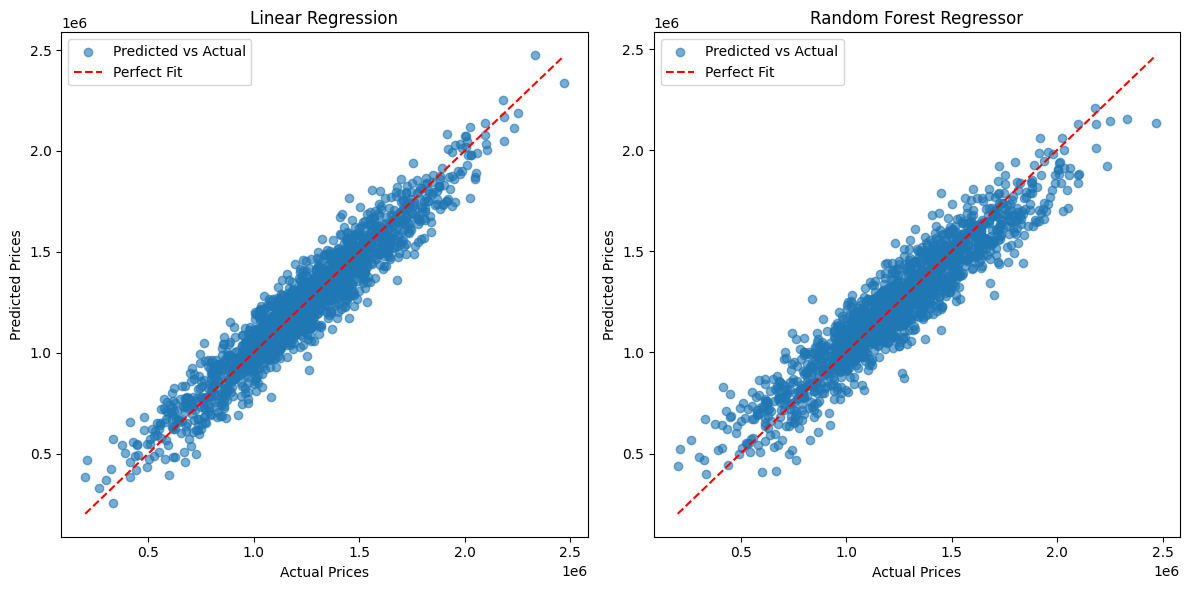

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

file_path = 'housing.csv'
data = pd.read_csv(file_path)

df = data.drop(columns=['Address'])

X = df.drop(columns=['Price'])
y = df['Price']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features for better performance of Linear Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Linear Regression ###
print("\n--- Linear Regression ---")
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)
y_pred_linear = linear_model.predict(X_test_scaled)

# Metrics for Linear Regression
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)
print(f"Mean Squared Error: {mse_linear:.2f}")
print(f"R2 Score: {r2_linear:.2f}")

### Random Forest Regressor ###
print("\n--- Random Forest Regressor ---")
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Metrics for Random Forest
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Mean Squared Error: {mse_rf:.2f}")
print(f"R2 Score: {r2_rf:.2f}")

### Visualization ###
# Plot predictions vs true values for both models
plt.figure(figsize=(12, 6))

# Linear Regression
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_linear, alpha=0.6, label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Fit')
plt.title("Linear Regression")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.legend()

# Random Forest
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_rf, alpha=0.6, label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Fit')
plt.title("Random Forest Regressor")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.legend()

plt.tight_layout()
plt.show()


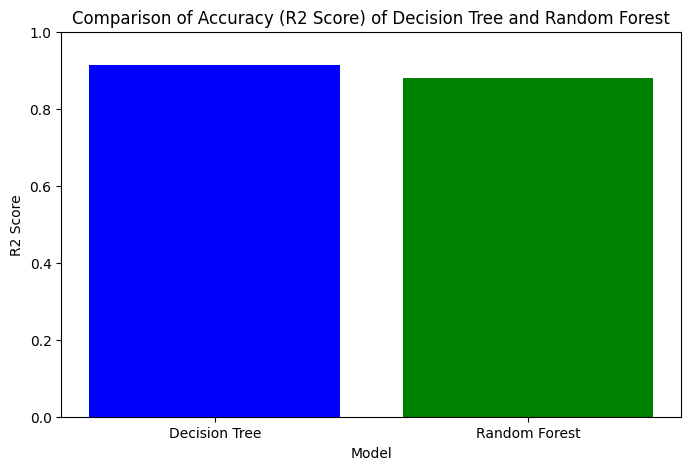

In [3]:
models = ['Decision Tree', 'Random Forest']
r2_scores = [r2_linear, r2_rf]

plt.figure(figsize=(8, 5))
plt.bar(models, r2_scores, color=['blue', 'green'])
plt.title('Comparison of Accuracy (R2 Score) of Decision Tree and Random Forest')
plt.xlabel('Model')
plt.ylabel('R2 Score')
plt.ylim(0, 1)
plt.show()